# All In One Notebook for AlphaFold Prediction Analysis

#### Features
- Automatically organize prediction results from AlphaFold
- View 3D structures in the remote server directly
- Detect interfaces between chains
- Prediction plots (pLDDT, PAE, coverage) can be viewed in the notebook
- Access to UniProt information of the protein

##### Import packages

In [1]:
import pandas as pd
from loader import *
from prediction import Prediction

##### Pre-processed data of screening (Optional)
> This part is not necessary. Only to sort the results by ipTM score.

In [2]:
asyn_df = pd.read_csv("/home/seamustard52/dpi_old/asyn_screen/result/high_asyn_rank_score.csv", 
                      index_col=0, header = None, names=['rank', 'lenA', 'lenB', 'ipTM','pdockq', 'iScore','DB', 'leniA', 'leniB' ]) # only rank1 models with ipTM >= 0.65
asyn_partners = asyn_df.index.tolist()
asyn_df.head()

,rank,lenA,lenB,ipTM,pdockq,iScore,DB,leniA,leniB
A6NGE7,1,140,173,0.90,0.328,7.981,none,28,23
P09455,1,140,135,0.90,0.465,3.319,none,38,35
P42025,1,140,376,0.88,0.463,5.212,none,38,32
P61163,1,140,376,0.88,0.468,6.205,none,33,32
Q9H1Y0,1,140,275,0.88,0.435,2.932,STRING,19,18


### 1. Load prediction results
> - input : path to the directory of prediction results
> - output : prediction class<br>
    Dictionary with paths (model, path)

In [3]:
asyn_path = get_path("asyn")
asyn_pred = Prediction(asyn_path)

print(asyn_pred)
print("pwd attribute:" ,asyn_pred.pwd)
print("model_paths attribute:")
print("\tKey:" ,asyn_pred.model_paths.popitem()[0])
print("\tValue:", end="")
for (k,v) in asyn_pred.model_paths.popitem()[1].items():
    print("\t\t",k,":",v)

pwd attribute: /home/seamustard52/dpi_old/asyn_screen/prediction/
model_paths attribute:
	Key: P37840_X6R8R1
	Value:		 msa : P37840_X6R8D5.a3m
		 pae.png : P37840_X6R8D5_pae.png
		 plddt.png : P37840_X6R8D5_plddt.png
		 coverage.png : P37840_X6R8D5_coverage.png
		 pae : P37840_X6R8D5_predicted_aligned_error_v1.json
		 score : {'rank1': 'P37840_X6R8D5_scores_rank_001_alphafold2_multimer_v3_model_4_seed_000.json', 'rank2': 'P37840_X6R8D5_scores_rank_002_alphafold2_multimer_v3_model_2_seed_000.json', 'rank3': 'P37840_X6R8D5_scores_rank_003_alphafold2_multimer_v3_model_3_seed_000.json', 'rank4': 'P37840_X6R8D5_scores_rank_004_alphafold2_multimer_v3_model_1_seed_000.json', 'rank5': 'P37840_X6R8D5_scores_rank_005_alphafold2_multimer_v3_model_5_seed_000.json'}
		 pdb : {'rank1': 'P37840_X6R8D5_unrelaxed_rank_001_alphafold2_multimer_v3_model_4_seed_000.pdb', 'rank2': 'P37840_X6R8D5_unrelaxed_rank_002_alphafold2_multimer_v3_model_2_seed_000.pdb', 'rank3': 'P37840_X6R8D5_unrelaxed_rank_003_alpha

### 2. Load model of interest
> - input : model name, rank
> - output : model class

In [3]:
# TODO : Define parameters
# partner = asyn_partners[0]
partner = "Q8TAP4"
rank = 1

In [4]:
asyn_model = asyn_pred.load_model(f"P37840_{partner}")
asyn_model.get_model(rank = rank)

print("=========================================================")
print(asyn_model)
print("pwd attribute:", asyn_model.pwd)
print("name attribute:", asyn_model.name)
print("path attribute:", asyn_model.path)
print("models attribute:", asyn_model.models['rank1']['score'])
print("models attribute:", asyn_model.models['rank1']['structure'])

Loaded scores of rank1
Find scores by calling e.g. model.models['rank1']['score']['plddt']
pwd attribute: /home/seamustard52/dpi_old/asyn_screen/prediction/
name attribute: P37840_Q8TAP4
path attribute: {'msa': 'P37840_Q8TAP4.a3m', 'pae.png': 'P37840_Q8TAP4_pae.png', 'plddt.png': 'P37840_Q8TAP4_plddt.png', 'coverage.png': 'P37840_Q8TAP4_coverage.png', 'pae': 'P37840_Q8TAP4_predicted_aligned_error_v1.json', 'score': {'rank1': 'P37840_Q8TAP4_scores_rank_001_alphafold2_multimer_v3_model_2_seed_000.json', 'rank2': 'P37840_Q8TAP4_scores_rank_002_alphafold2_multimer_v3_model_1_seed_000.json', 'rank3': 'P37840_Q8TAP4_scores_rank_003_alphafold2_multimer_v3_model_3_seed_000.json', 'rank4': 'P37840_Q8TAP4_scores_rank_004_alphafold2_multimer_v3_model_5_seed_000.json', 'rank5': 'P37840_Q8TAP4_scores_rank_005_alphafold2_multimer_v3_model_4_seed_000.json'}, 'pdb': {'rank1': 'P37840_Q8TAP4_unrelaxed_rank_001_alphafold2_multimer_v3_model_2_seed_000.pdb', 'rank2': 'P37840_Q8TAP4_unrelaxed_rank_002_alph

### Show prediction outputs
> - Show 3D structure : interface(True, False), color scheme(dpi, asyn, chain, ss, plddt, plddt_dpi)
> - show plots : pLDDT, PAE, coverage

In [8]:
asyn_model.show_3d(rank=rank, interface=False, color_scheme="plddt")

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

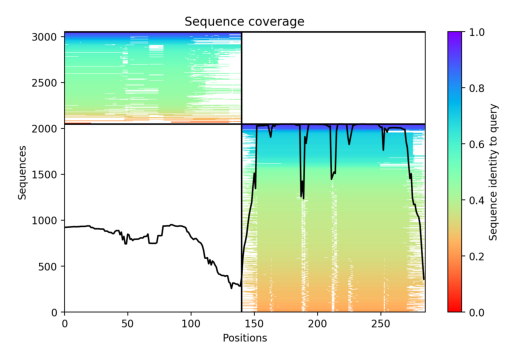

In [79]:
asyn_model.show_coverage()

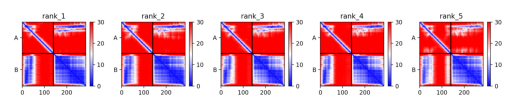

In [80]:
asyn_model.show_pae()

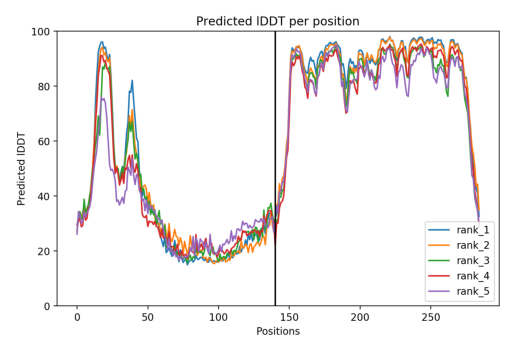

In [81]:
asyn_model.show_plddt()

### Get UniProt information
> methods: get_info(), get_description(), get_comment(), get_goterms(), get_gene()

In [82]:
info = asyn_model.get_info()
print(info.keys())

Getting information of Q8TAP4
Getting gene name of Q8TAP4
Getting description of Q8TAP4
Getting GO terms of Q8TAP4
Getting comment of Q8TAP4
dict_keys(['gene', 'description', 'GO', 'INTERACTION', 'ALTERNATIVE PRODUCTS'])


In [85]:
print(info['gene'])
print(info['description'])
print(info['GO']['biological process'])
print(info['INTERACTION'])

['LMO3']
['LIM domain only protein 3', 'Neuronal-specific transcription factor DAT1', 'Rhombotin-3']
['acute-phase response [GO:0006953]', 'inflammatory response [GO:0006954]', 'maintenance of gastrointestinal epithelium [GO:0030277]', 'regulation of lipid metabolic process [GO:0019216]']
Q8TAP4; Q8N9N5: BANP; NbExp=3; IntAct=EBI-742259, EBI-744695; Q8TAP4; Q8NA61: CBY2; NbExp=3; IntAct=EBI-742259, EBI-741724; Q8TAP4; Q8IYX8-2: CEP57L1; NbExp=3; IntAct=EBI-742259, EBI-10181988; Q8TAP4; Q96AQ9: FAM131C; NbExp=3; IntAct=EBI-742259, EBI-741921; Q8TAP4; Q8WUP2: FBLIM1; NbExp=5; IntAct=EBI-742259, EBI-3864120; Q8TAP4; Q6FG41: FOS; NbExp=3; IntAct=EBI-742259, EBI-10198738; Q8TAP4; Q13422: IKZF1; NbExp=3; IntAct=EBI-742259, EBI-745305; Q8TAP4; Q719H9: KCTD1; NbExp=3; IntAct=EBI-742259, EBI-9027502; Q8TAP4; Q86Y26: NUTM1; NbExp=3; IntAct=EBI-742259, EBI-10178410; Q8TAP4; Q8N6K7: SAMD3; NbExp=3; IntAct=EBI-742259, EBI-748741; Q8TAP4; Q02446: SP4; NbExp=3; IntAct=EBI-742259, EBI-10198587; Q8TAP4